In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/drive/MyDrive/US Police shootings in from 2015-22.csv')

In [3]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [4]:
df.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
5,6,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True
6,7,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,-111.841,33.328,True
7,8,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,-97.564,38.704,True
8,9,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,-91.119,40.809,True
9,10,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,-79.991,40.413,True


In [5]:
df.count()

id                         7729
name                       7312
date                       7729
manner_of_death            7729
armed                      7520
age                        7247
gender                     7709
race                       6269
city                       7729
state                      7729
signs_of_mental_illness    7729
threat_level               7729
flee                       6854
body_camera                7729
longitude                  6892
latitude                   6892
is_geocoding_exact         7729
dtype: int64

In [6]:
#Checking the number of null values for each attribute
df.isnull().sum()

id                            0
name                        417
date                          0
manner_of_death               0
armed                       209
age                         482
gender                       20
race                       1460
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        875
body_camera                   0
longitude                   837
latitude                    837
is_geocoding_exact            0
dtype: int64

In [7]:
#Since the names cannot be null and we just can't give some random values for unknown names, so I'll just assign John Doe name
df['name'] = df['name'].fillna('John Doe')

In [8]:
#Checking the count of names with null values post processesing
df['name'].isnull().sum()

0

In [9]:
#Number of unique arms reported in the incidents
df['armed'].nunique()

104

In [10]:
#Number of races of the targeted victims reported
df['race'].nunique()

6

In [11]:
df['race'].fillna('Other', inplace=True)

In [12]:
df['race'].describe()

count     7729
unique       7
top          W
freq      3198
Name: race, dtype: object

In [13]:
df['city'].mode()

0    Los Angeles
Name: city, dtype: object

In [14]:
df['city'].value_counts()

Los Angeles         128
Phoenix             101
Houston              87
San Antonio          66
Las Vegas            63
                   ... 
Valdez                1
Pinetop-Lakeside      1
Duarte                1
Perryopolis           1
Strongs Prairie       1
Name: city, Length: 3148, dtype: int64

In [15]:
#Unique states in which the incidents are reported
df['state'].nunique()

51

In [16]:
state_count_info = df['state'].value_counts()
state_count_list = [list(info) for info in zip(state_count_info.values, state_count_info.index)]
print(state_count_list)

[[1114, 'CA'], [694, 'TX'], [494, 'FL'], [351, 'AZ'], [291, 'GA'], [279, 'CO'], [222, 'OH'], [221, 'NC'], [212, 'WA'], [211, 'OK'], [209, 'TN'], [200, 'MO'], [166, 'NM'], [160, 'PA'], [157, 'IL'], [155, 'LA'], [146, 'AL'], [141, 'KY'], [140, 'IN'], [139, 'NY'], [137, 'VA'], [130, 'MI'], [125, 'OR'], [124, 'NV'], [124, 'SC'], [117, 'WI'], [109, 'AR'], [107, 'MD'], [98, 'MS'], [88, 'UT'], [88, 'NJ'], [86, 'MN'], [73, 'WV'], [71, 'KS'], [62, 'ID'], [54, 'MA'], [53, 'AK'], [49, 'MT'], [48, 'IA'], [39, 'NE'], [37, 'HI'], [33, 'ME'], [27, 'SD'], [26, 'WY'], [24, 'DC'], [22, 'CT'], [22, 'NH'], [18, 'ND'], [17, 'DE'], [13, 'VT'], [6, 'RI']]


In [17]:
state_count_list.sort(reverse=True)

In [18]:
print(state_count_list)

[[1114, 'CA'], [694, 'TX'], [494, 'FL'], [351, 'AZ'], [291, 'GA'], [279, 'CO'], [222, 'OH'], [221, 'NC'], [212, 'WA'], [211, 'OK'], [209, 'TN'], [200, 'MO'], [166, 'NM'], [160, 'PA'], [157, 'IL'], [155, 'LA'], [146, 'AL'], [141, 'KY'], [140, 'IN'], [139, 'NY'], [137, 'VA'], [130, 'MI'], [125, 'OR'], [124, 'SC'], [124, 'NV'], [117, 'WI'], [109, 'AR'], [107, 'MD'], [98, 'MS'], [88, 'UT'], [88, 'NJ'], [86, 'MN'], [73, 'WV'], [71, 'KS'], [62, 'ID'], [54, 'MA'], [53, 'AK'], [49, 'MT'], [48, 'IA'], [39, 'NE'], [37, 'HI'], [33, 'ME'], [27, 'SD'], [26, 'WY'], [24, 'DC'], [22, 'NH'], [22, 'CT'], [18, 'ND'], [17, 'DE'], [13, 'VT'], [6, 'RI']]


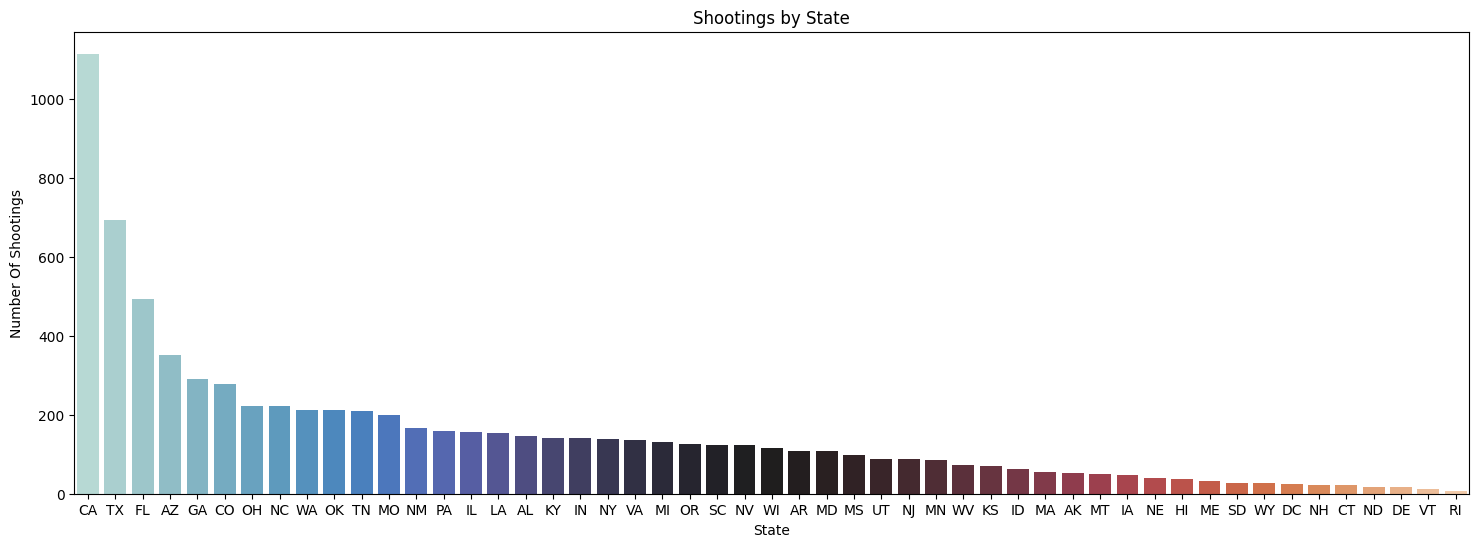

In [19]:
# a plot for states vs number of incidents is plotted here
import seaborn as sns
import matplotlib.pyplot as plt

x = [i[1] for i in state_count_list]
y = [i[0] for i in state_count_list]

plt.figure(figsize=(18,6))
sns.barplot(x=x,y=y,palette='icefire')
plt.xlabel(xlabel = 'State')
plt.ylabel(ylabel = 'Number Of Shootings')
plt.title(label = 'Shootings by State')
plt.show()

The above graph depicts that the incidents in California are highest, followed by Texas

### Distribution of Age

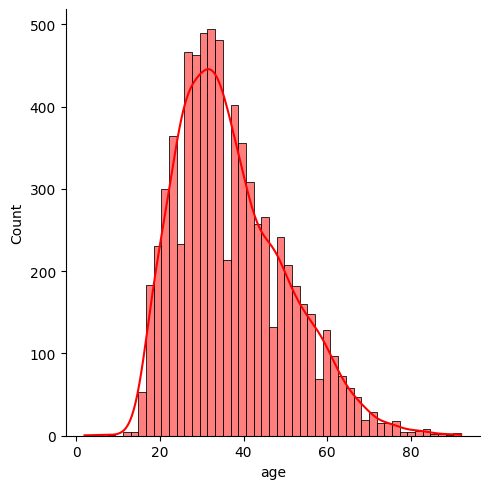

In [20]:
#Age distibution of the victims reported

sns.displot(df['age'],kde=True,color='r')

In [21]:
#Replacing missing values in the 'age' column with the mean value of the non-missing values

df['age'] = df['age'].fillna(df['age'].mean())

In [22]:
import numpy as np

#Adding column Age Group of the person based on the grouping as defined below

conditions = [
    (df['age'] <= 18),
    (df['age'] > 18) & (df['age'] <= 40),
    (df['age'] > 40) & (df['age'] <= 60),
    (df['age'] > 60)
    ]

# create a list of the values we want to assign for each condition
values = ['Age less than 18', 'Age between 18 and 40', 'Age between 40 and 60', 'Age greater than 60']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Age_group_of_the_Person'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,Age_group_of_the_Person
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,Age between 40 and 60
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,Age between 40 and 60
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,Age between 18 and 40
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,Age between 18 and 40
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,Age between 18 and 40


In [23]:
df['Age_group_of_the_Person'].value_counts()

Age between 18 and 40    4976
Age between 40 and 60    2099
Age greater than 60       404
Age less than 18          250
Name: Age_group_of_the_Person, dtype: int64

In [24]:
data = df.dropna(subset=['latitude', 'longitude'])
data = data[data['is_geocoding_exact'] == True]

In [25]:
# !pip install basemap

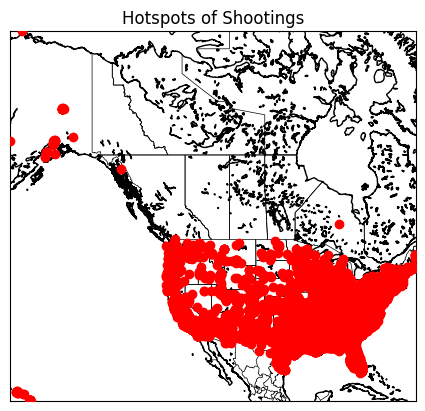

In [26]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Create a basemap instance
map = Basemap(projection='merc', llcrnrlat=min(data['latitude']), urcrnrlat=max(data['latitude']),
              llcrnrlon=min(data['longitude']), urcrnrlon=max(data['longitude']), lat_ts=20, resolution='i')

map.drawcoastlines()
map.drawcountries()
map.drawstates()

# Convert latitude and longitude to x and y coordinates
x, y = map(data['longitude'].values, data['latitude'].values)

# Plot them on the map
map.scatter(x, y, marker='o', color='r', zorder=5)
plt.title('Hotspots of Shootings')
plt.show()


<ipython-input-27-44f133a8ae0c>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data['longitude'], y=data['latitude'], cmap="Reds", shade=True, bw_adjust=0.5)


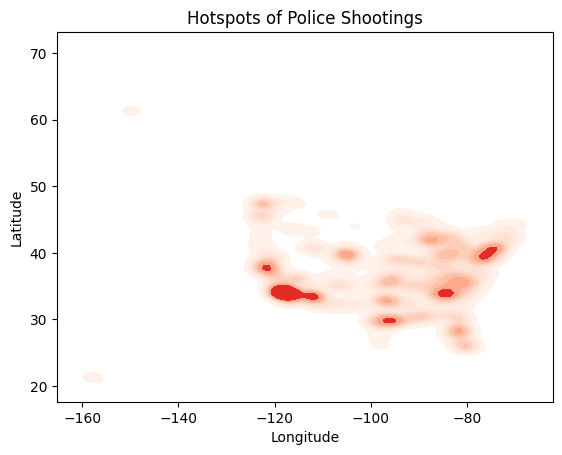

In [27]:
# You may need to adjust the bandwidth depending on your specific dataset
sns.kdeplot(x=data['longitude'], y=data['latitude'], cmap="Reds", shade=True, bw_adjust=0.5)

plt.title('Hotspots of Police Shootings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

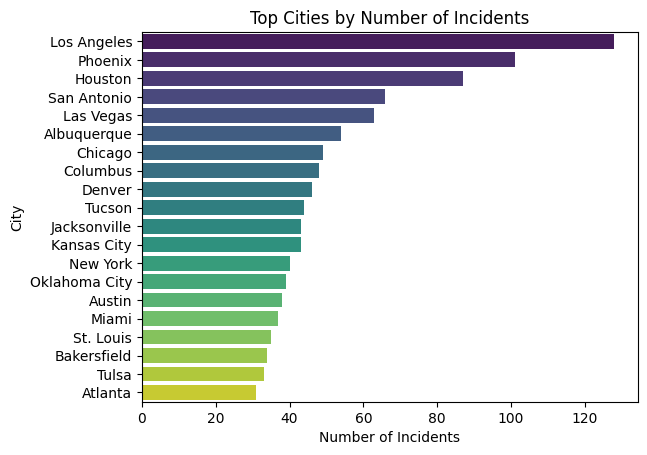

In [28]:
# Number of incidents vs the city the incident occured

incident_counts = df['city'].value_counts().reset_index(name='incident_count')

# Selecting the top 20 cities by incident count
top_cities = incident_counts.head(20)

sns.barplot(x='incident_count', y='index', data=top_cities, palette='viridis')
plt.xlabel('Number of Incidents')
plt.ylabel('City')
plt.title('Top Cities by Number of Incidents')
plt.show()


In [29]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact',
       'Age_group_of_the_Person'],
      dtype='object')

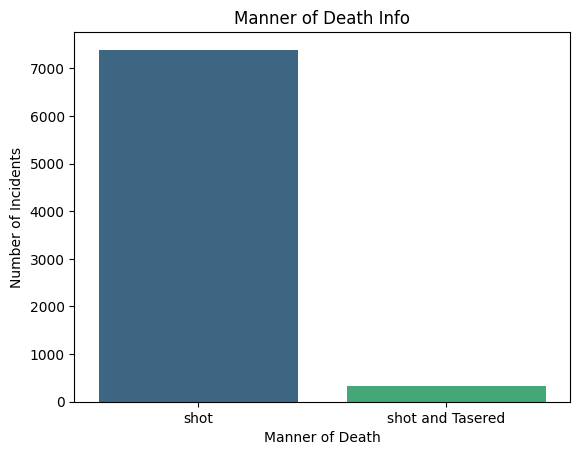

In [30]:
#Plotting manner of death reported
manner_of_death_counts = df['manner_of_death'].value_counts().reset_index(name='incident_count')
x = manner_of_death_counts['index']
y = manner_of_death_counts['incident_count']
sns.barplot(x=x, y=y, palette='viridis')

plt.ylabel('Number of Incidents')
plt.xlabel('Manner of Death')
plt.title('Manner of Death Info')
plt.show()


## Male vs Female

<ipython-input-31-5de26a0f1983>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_male, hist=False, rug=True,color='red')
<ipython-input-31-5de26a0f1983>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_female, hist=False, rug=True,color='green')


<Axes: ylabel='Density'>

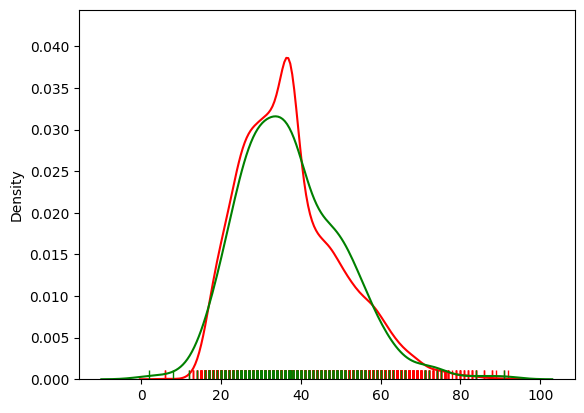

In [31]:
df_male=df[df['gender']=='M']['age'].values
df_female=df[df['gender']=='F']['age'].values


sns.distplot(df_male, hist=False, rug=True,color='red')
sns.distplot(df_female, hist=False, rug=True,color='green')

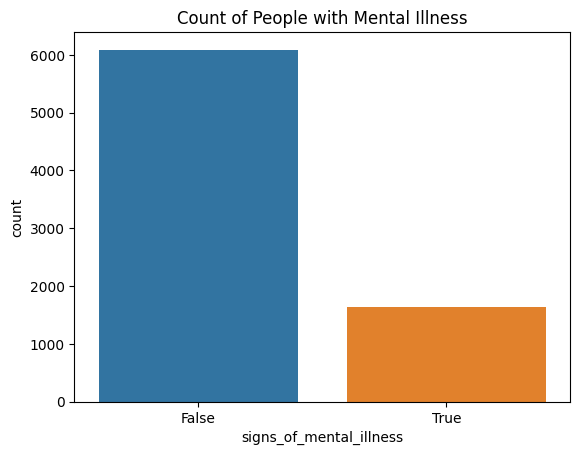

In [32]:
sns.countplot(data=df,x='signs_of_mental_illness')
plt.title("Count of People with Mental Illness")
plt.show()

The above data specifies that most of the victims did not have mental illness

# Was the victim fleeing?

In [33]:
df['flee'].isna().sum()

875

In [34]:
df['flee'] = df['flee'].fillna('unknown')

<Axes: >

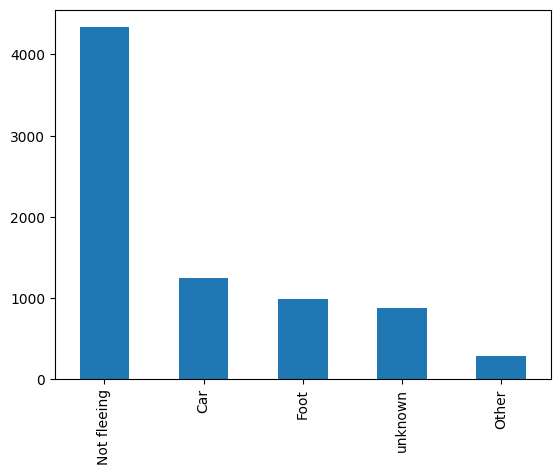

In [35]:
df['flee'].value_counts().plot(kind='bar')

Data suggests majority of the victims didnot flee from the incident site

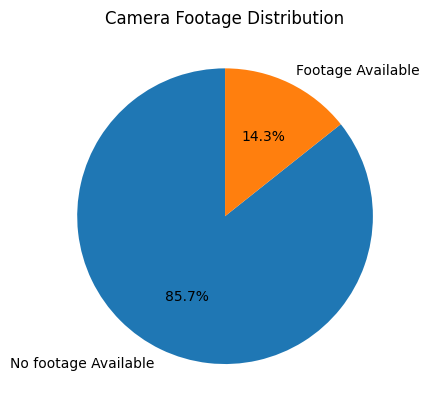

In [36]:
body_camera_counts = df['body_camera'].value_counts()

x = ['No footage Available', 'Footage Available']
y = body_camera_counts.values

plt.pie(y, labels=x, autopct='%1.1f%%', startangle=90)
plt.title('Camera Footage Distribution')
plt.show()

Most of the incidents happend when the Body Cam is OFF/ Not Available.

# *Yearly, Monthly and Seasonal Trends*

In [37]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

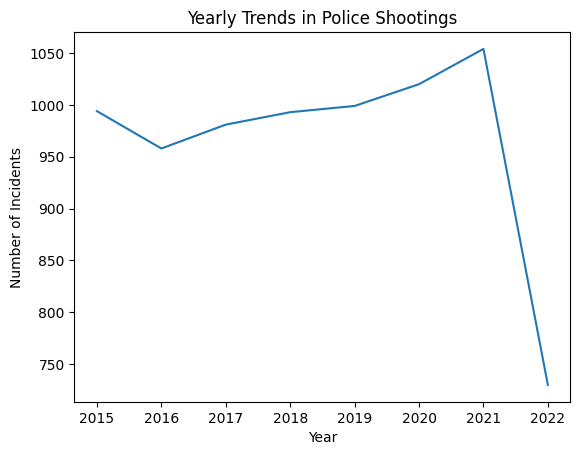

In [38]:
yearly_data = df.groupby(df['date'].dt.year).size()

# Plot the data
yearly_data.plot(kind='line', title='Yearly Trends in Police Shootings')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

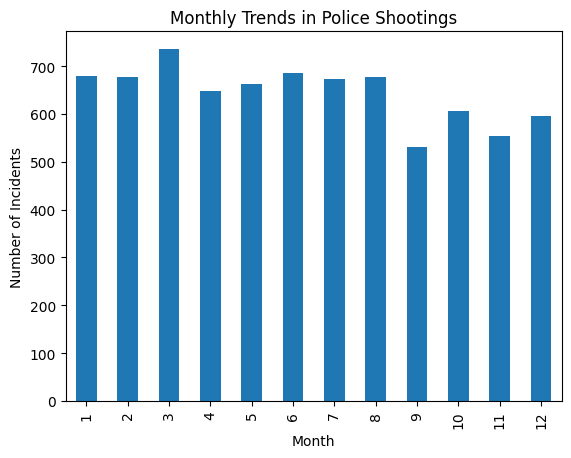

In [39]:
# Group by month (across all years)
monthly_data = df.groupby(df['date'].dt.month).size()

# Plot the data
monthly_data.plot(kind='bar', title='Monthly Trends in Police Shootings')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.show()

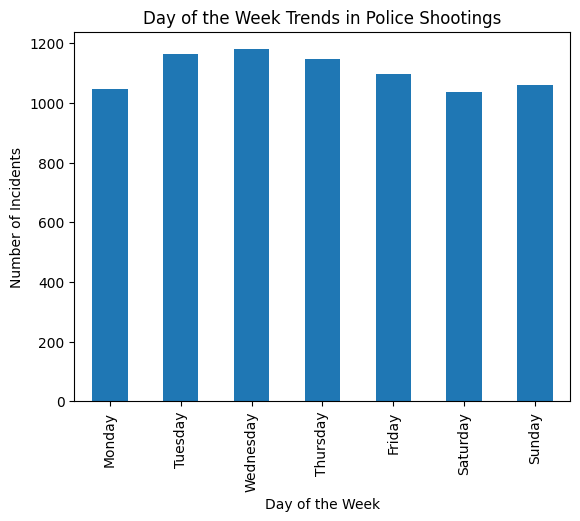

In [40]:
# Group by day of the week
weekday_data = df.groupby(df['date'].dt.dayofweek).size()

# Rename index to day names
weekday_data.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the data
weekday_data.plot(kind='bar', title='Day of the Week Trends in Police Shootings')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.show()

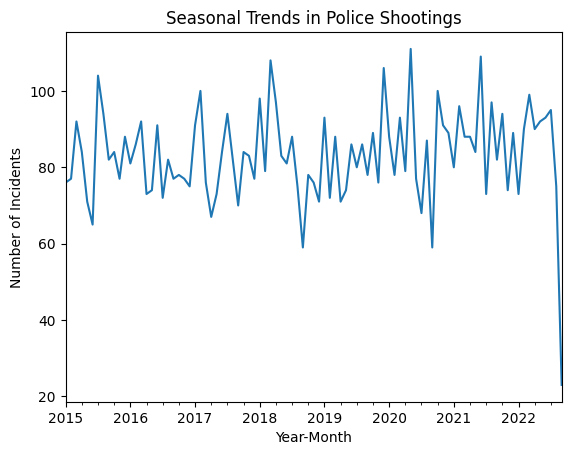

In [41]:
# Extract month and year for seasonal analysis
df['year_month'] = df['date'].dt.to_period('M')

# Group by year-month
seasonal_data = df.groupby('year_month').size()

# Plot the data
seasonal_data.plot(kind='line', title='Seasonal Trends in Police Shootings')
plt.xlabel('Year-Month')
plt.ylabel('Number of Incidents')
plt.show()

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,Age_group_of_the_Person,year_month
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,Age between 40 and 60,2015-01
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,Age between 40 and 60,2015-01
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,Age between 18 and 40,2015-01
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,Age between 18 and 40,2015-01
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,Age between 18 and 40,2015-01


In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

df['year'] = df['date'].dt.year

# Aggregate data by year to count the number of incidents per year
annual_incidents = df.groupby('year').size().reset_index(name='incident_count')

# Define features (X) and target (y)
X = annual_incidents[annual_incidents['year'] < 2022][['year']]
y = annual_incidents[annual_incidents['year'] < 2022]['incident_count']

# Split the data into training and test sets excluding 2022
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store models and their performance metrics
model_performance = {}

# List of regression models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Support Vector Regression': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Polynomial Regression (Degree 2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Polynomial Regression (Degree 3)': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
}

# Evaluate each model using cross-validation and calculate performance metrics
for model_name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_score_mean = -cv_scores.mean()

    # Fit model to training data
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store metrics in the dictionary
    model_performance[model_name] = {
        'Cross-Validation Mean MSE': cv_score_mean,
        'Test MSE': mse,
        'Test MAE': mae,
        'Test R^2': r2,
    }

# Output the performance metrics for each model
for model_name, metrics in model_performance.items():
    print(f"{model_name} performance:")
    for metric_name, metric_value in metrics.items():
        print(f"   {metric_name}: {metric_value:.4f}")
    print()  # for better readability

# Identify the best model based on Cross-Validation Mean MSE
best_model_name = min(model_performance, key=lambda k: model_performance[k]['Cross-Validation Mean MSE'])
print(f"Best model based on CV Mean MSE: {best_model_name}")

Linear Regression performance:
   Cross-Validation Mean MSE: 225.5031
   Test MSE: 1447.3450
   Test MAE: 27.1500
   Test R^2: -3.4671

Ridge Regression performance:
   Cross-Validation Mean MSE: 235.7399
   Test MSE: 1137.4534
   Test MAE: 25.8636
   Test R^2: -2.5107

Lasso Regression performance:
   Cross-Validation Mean MSE: 232.3520
   Test MSE: 1342.1200
   Test MAE: 26.4000
   Test R^2: -3.1423

Support Vector Regression performance:
   Cross-Validation Mean MSE: 977.4551
   Test MSE: 822.1509
   Test MAE: 22.5560
   Test R^2: -1.5375

Decision Tree Regression performance:
   Cross-Validation Mean MSE: 384.2000
   Test MSE: 349.0000
   Test MAE: 18.0000
   Test R^2: -0.0772

Random Forest Regression performance:
   Cross-Validation Mean MSE: 391.3808
   Test MSE: 437.2096
   Test MAE: 18.0000
   Test R^2: -0.3494

Gradient Boosting Regression performance:
   Cross-Validation Mean MSE: 384.2038
   Test MSE: 349.0075
   Test MAE: 18.0000
   Test R^2: -0.0772

Polynomial Regression

In [46]:
best_model = models[best_model_name]
best_model.fit(X, y)

In [48]:
prediction_input_2023 = pd.DataFrame([[2023]], columns=['year'])

prediction_2023 = best_model.predict(prediction_input_2023)

# The prediction_2023 variable now holds the estimated number of incidents for the year 2023
print(f"Predicted number of incidents for 2023: {prediction_2023[0]:.2f}")

Predicted number of incidents for 2023: 1139.36


In [50]:
prediction_input_2022 = pd.DataFrame([[2022]], columns=['year'])

prediction_2022 = best_model.predict(prediction_input_2022)

# The prediction_2023 variable now holds the estimated number of incidents for the year 2023
print(f"Predicted number of incidents for 2022: {prediction_2022[0]:.2f}")

Predicted number of incidents for 2022: 1092.71


In [51]:
days_in_year = 365

# Before predicting with the best model, ensure the input is a DataFrame
prediction_input_2022 = pd.DataFrame([[2022]], columns=['year'])

prediction_2022_partial = best_model.predict(prediction_input_2022)

# Output the predictions
# Get the last date available in your 2022 data
last_date_2022 = df[df['year'] == 2022]['date'].max()

# Calculate the day of the year for this date
last_day_partial_2022 = last_date_2022.timetuple().tm_yday

# Now you can use this value to adjust the partial year prediction
days_in_year = 365  # Use 366 for leap years
adjusted_2022_prediction = prediction_2022_partial * (days_in_year / last_day_partial_2022)

In [52]:
adjusted_2022_prediction

array([1595.36285717])